Unemployment Analysis with Python

In [ ]:
!pip install seaborn --quiet

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset
file_path = "/content/Unemployment in India.csv"
data = pd.read_csv(file_path)

In [ ]:
#display first few rows
print("Preview of dataset:")
display(data.head())

Preview of dataset:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
# Check basic info
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
#rename columns
data.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
                'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region']

In [ ]:
#convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

/tmp/ipython-input-8-2892715892.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
#check for null values
print("Null Values:")
print(data.isnull().sum())

Null Values:
State                                      28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Region                                     28
dtype: int64


In [ ]:
# Summary statistics
print("Summary Statistics:")
display(data.describe())

Summary Statistics:


,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


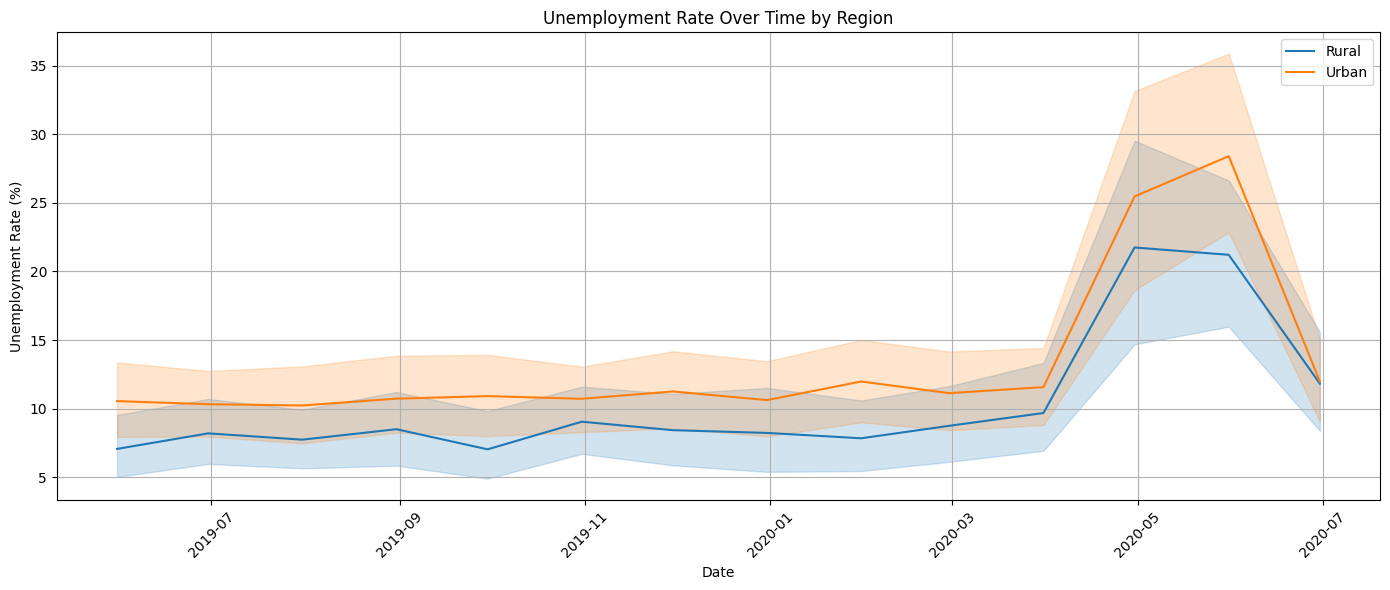

In [ ]:
# Unemployment Rate over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title("Unemployment Rate Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

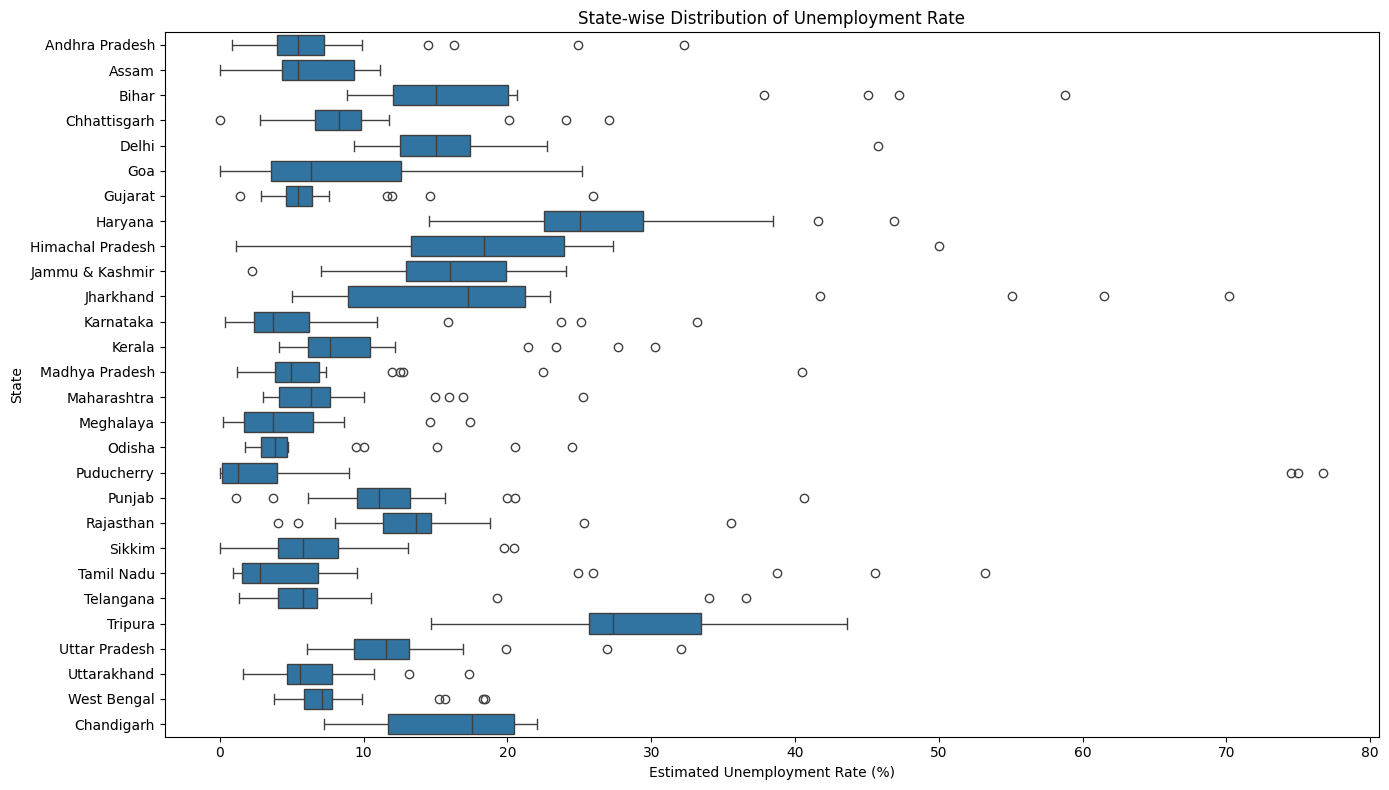

In [ ]:
# Boxplot to see distribution across states
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Estimated Unemployment Rate (%)', y='State')
plt.title("State-wise Distribution of Unemployment Rate")
plt.tight_layout()
plt.show()

/tmp/ipython-input-14-1316717767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_unemp.values, y=avg_unemp.index, palette='coolwarm')


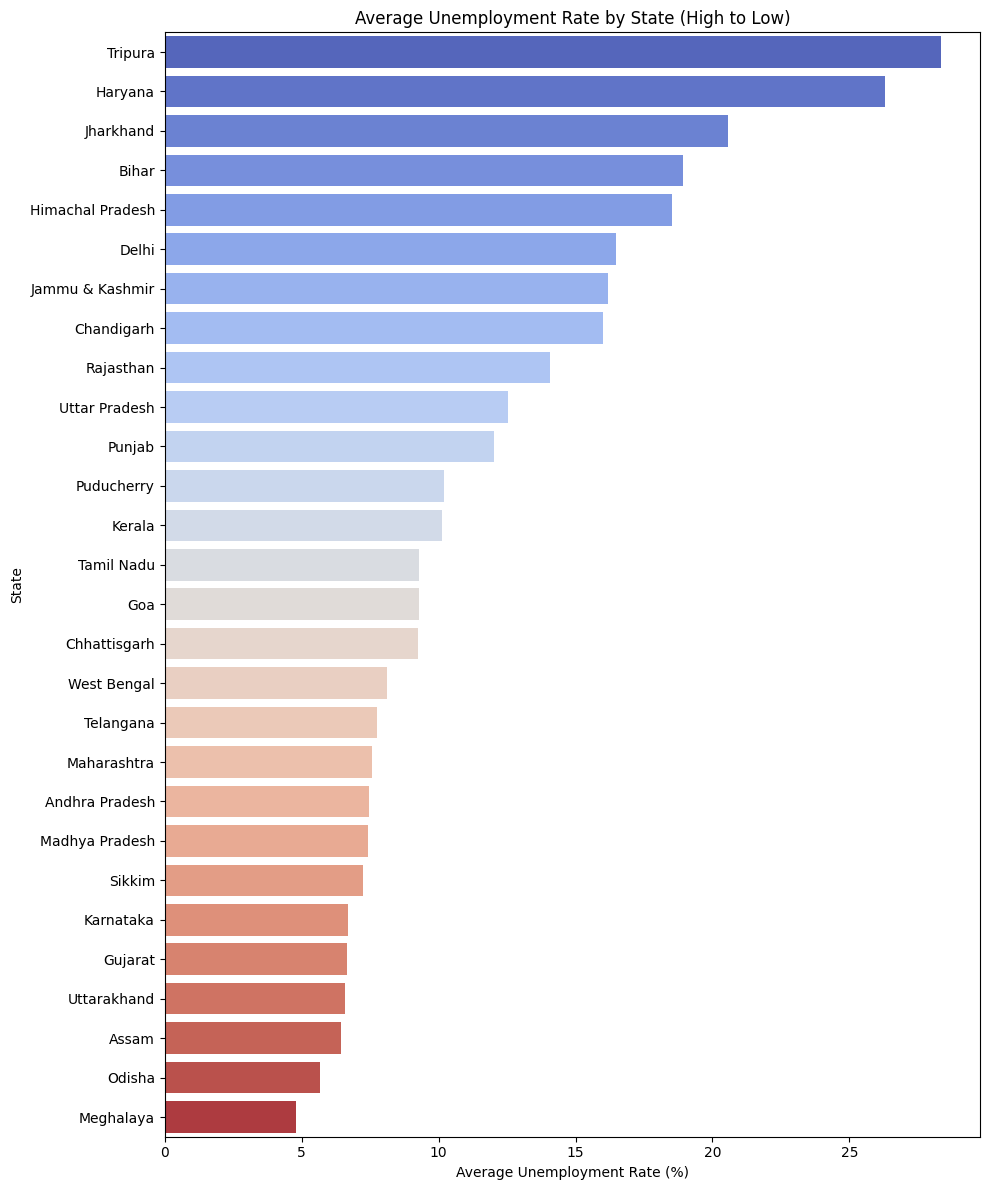

In [ ]:
#heatmap for average unemployment rate by state
avg_unemp = data.groupby('State')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 12))
sns.barplot(x=avg_unemp.values, y=avg_unemp.index, palette='coolwarm')
plt.title("Average Unemployment Rate by State (High to Low)")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

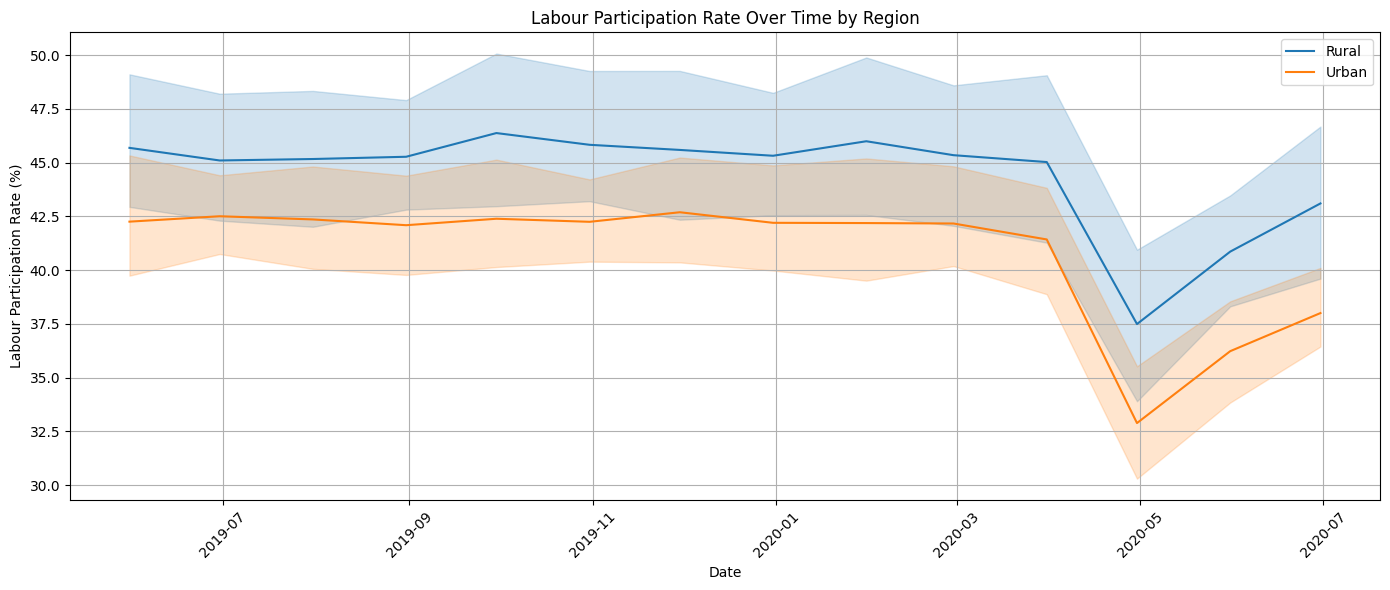

In [ ]:
#trend in Labour Participation Rate
plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x='Date', y='Estimated Labour Participation Rate (%)', hue='Region')
plt.title("Labour Participation Rate Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Labour Participation Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

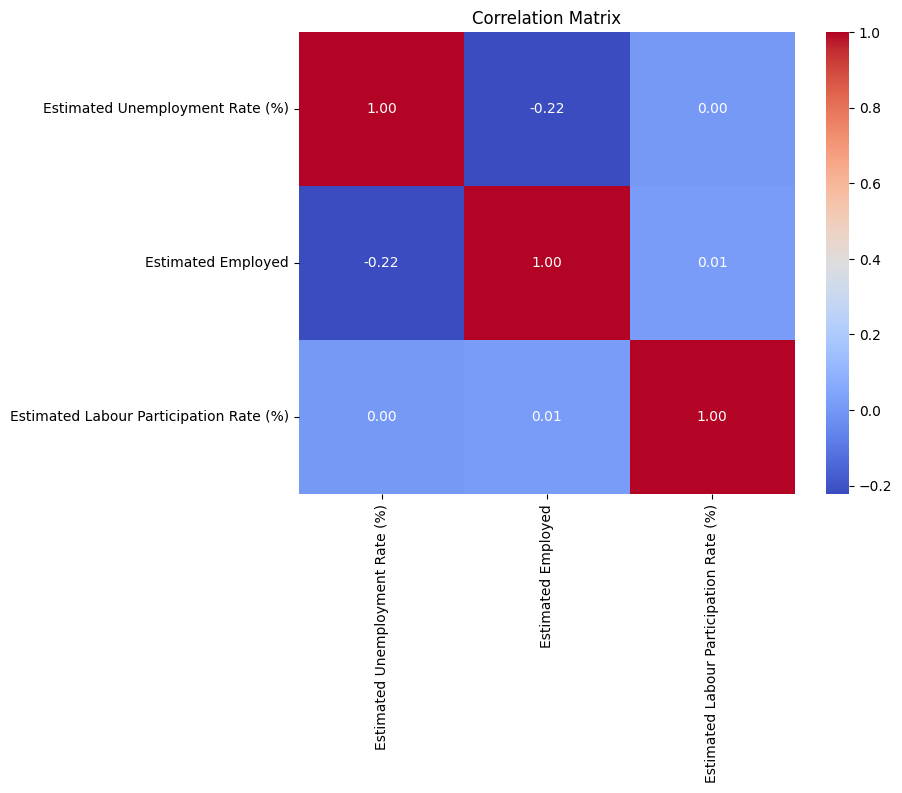

In [ ]:
#correlation Matrix
plt.figure(figsize=(8, 6))
corr = data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()